# Train a Decision Tree Classifier and Visualize the Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv(r"C:\Users\arjun\Downloads\archive (14)\heart.csv") 

In [7]:
X = df.drop("target", axis=1)
y = df["target"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

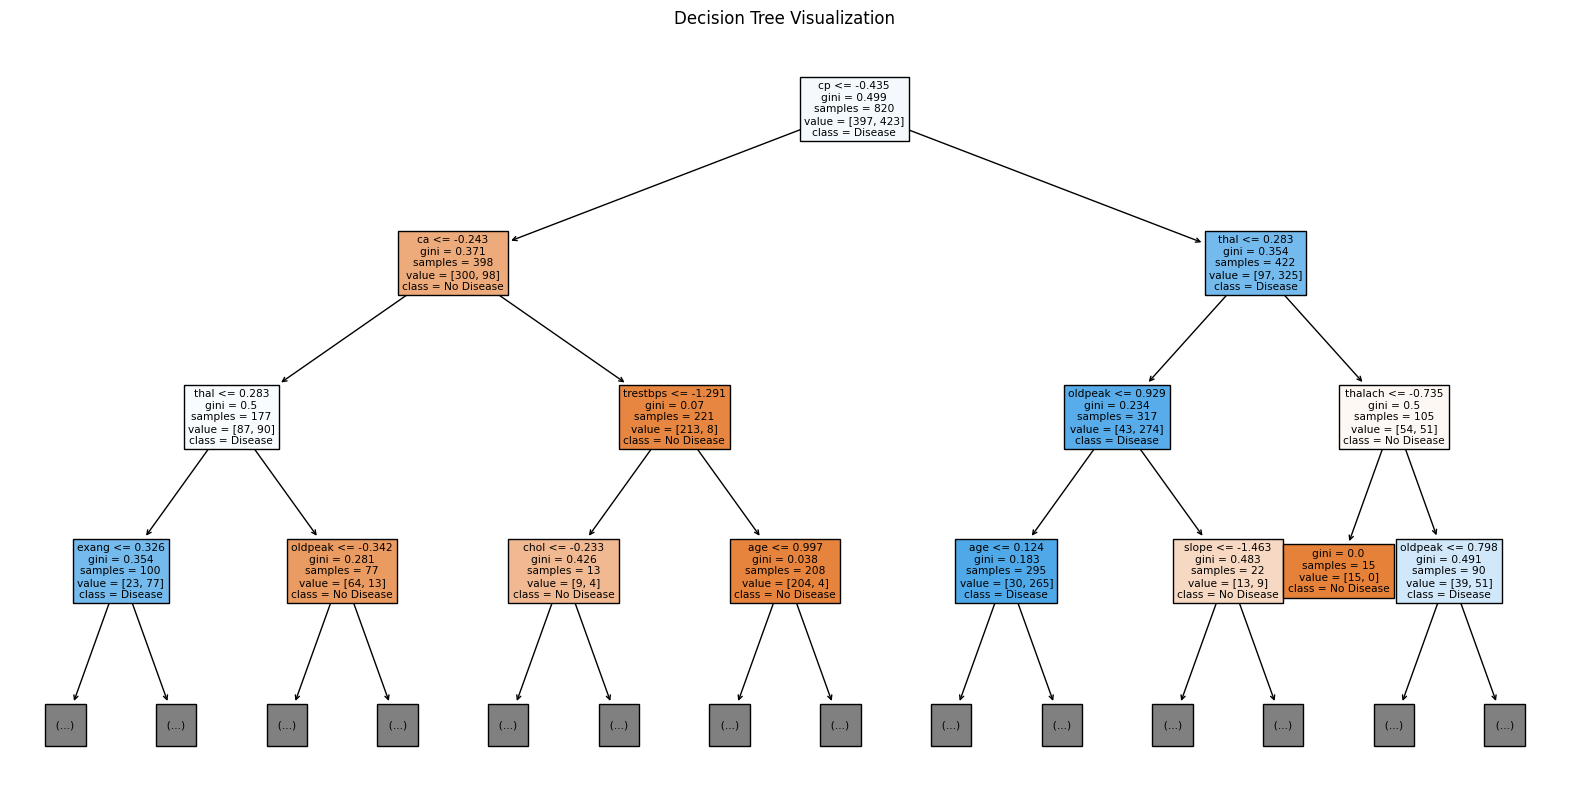

In [12]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

# Analyze overfitting and control tree depth.

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
dt_overfit = DecisionTreeClassifier(random_state=42)
dt_overfit.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [16]:
print("Overfit Tree - Train Accuracy:", accuracy_score(y_train, dt_overfit.predict(X_train_scaled)))
print("Overfit Tree - Test Accuracy:", accuracy_score(y_test, dt_overfit.predict(X_test_scaled)))

print("Pruned Tree - Train Accuracy:", accuracy_score(y_train, dt_pruned.predict(X_train_scaled)))
print("Pruned Tree - Test Accuracy:", accuracy_score(y_test, dt_pruned.predict(X_test_scaled)))

Overfit Tree - Train Accuracy: 1.0
Overfit Tree - Test Accuracy: 0.9853658536585366
Pruned Tree - Train Accuracy: 0.8829268292682927
Pruned Tree - Test Accuracy: 0.8


# Train a Random Forest and compare accuracy.

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
print("Random Forest - Train Accuracy:", accuracy_score(y_train, rf.predict(X_train_scaled)))
print("Random Forest - Test Accuracy:", accuracy_score(y_test, rf.predict(X_test_scaled)))

Random Forest - Train Accuracy: 1.0
Random Forest - Test Accuracy: 0.9853658536585366


# Interpret feature importances

In [18]:
import seaborn as sns

In [19]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

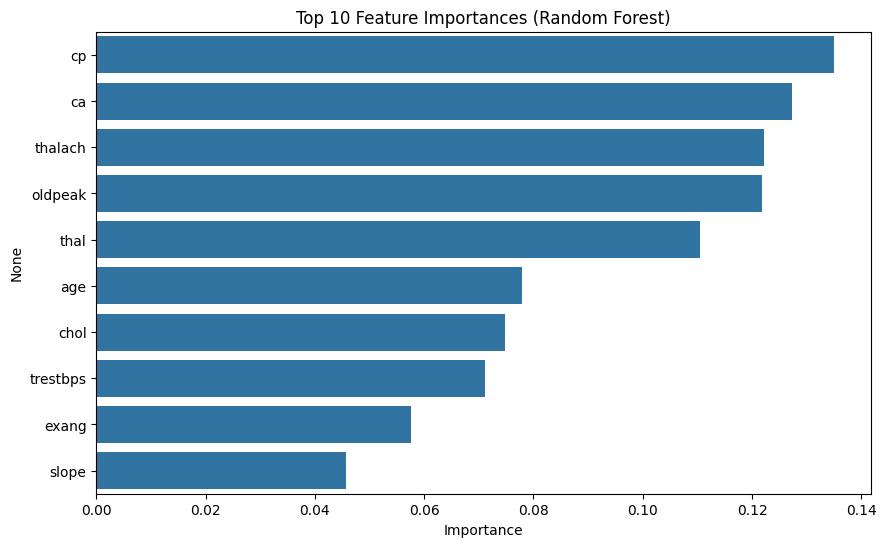

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()

# Evaluate using cross-validation

In [22]:
from sklearn.model_selection import cross_val_score
cv_dt = cross_val_score(dt_pruned, X, y, cv=5)
cv_rf = cross_val_score(rf, X, y, cv=5)
print(f"Decision Tree CV Accuracy: {cv_dt.mean():.2f} ± {cv_dt.std():.2f}")
print(f"Random Forest CV Accuracy: {cv_rf.mean():.2f} ± {cv_rf.std():.2f}")


Decision Tree CV Accuracy: 0.83 ± 0.02
Random Forest CV Accuracy: 1.00 ± 0.01
